In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('telco_customer.csv')

print("=== OVERVIEW DATASET ===")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\n=== INFO DATASET ===")
print(df.info())

print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

print("\n=== DATA TYPES ===")
print(df.dtypes)

# Konversi TotalCharges ke numeric (kemungkinan ada nilai yang tidak valid)
print("\n=== KONVERSI TOTAL CHARGES ===")
print("Unique values in TotalCharges (first 10):", df['TotalCharges'].unique()[:10])

# Cek nilai yang tidak bisa dikonversi
non_numeric_total = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]
print(f"Jumlah nilai non-numeric di TotalCharges: {len(non_numeric_total)}")

# Konversi TotalCharges ke numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values setelah konversi
print(f"Missing values setelah konversi: {df['TotalCharges'].isnull().sum()}")

print("\n=== STATISTICAL SUMMARY ===")
print("Numerical columns:")
print(df.describe())

print("\n=== CATEGORICAL VARIABLES SUMMARY ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

print("\n=== CHURN ANALYSIS ===")
print("Churn distribution:")
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print(churn_counts)
print(f"Churn rate: {churn_percentage['Yes']:.2f}%")

# Analisis korelasi untuk numerical variables
print("\n=== CORRELATION ANALYSIS ===")
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# Visualizations
plt.figure(figsize=(20, 15))

# 1. Churn Distribution
plt.subplot(3, 4, 1)
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.xticks(rotation=0)

# 2. Gender vs Churn
plt.subplot(3, 4, 2)
pd.crosstab(df['gender'], df['Churn']).plot(kind='bar', stacked=True)
plt.title('Gender vs Churn')
plt.xticks(rotation=0)

# 3. Senior Citizen vs Churn
plt.subplot(3, 4, 3)
pd.crosstab(df['SeniorCitizen'], df['Churn']).plot(kind='bar', stacked=True)
plt.title('Senior Citizen vs Churn')
plt.xticks(rotation=0)

# 4. Contract vs Churn
plt.subplot(3, 4, 4)
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar', stacked=True)
plt.title('Contract vs Churn')
plt.xticks(rotation=45)

# 5. Internet Service vs Churn
plt.subplot(3, 4, 5)
pd.crosstab(df['InternetService'], df['Churn']).plot(kind='bar', stacked=True)
plt.title('Internet Service vs Churn')
plt.xticks(rotation=45)

# 6. Payment Method vs Churn
plt.subplot(3, 4, 6)
pd.crosstab(df['PaymentMethod'], df['Churn']).plot(kind='bar', stacked=True)
plt.title('Payment Method vs Churn')
plt.xticks(rotation=45)

# 7. Monthly Charges Distribution
plt.subplot(3, 4, 7)
df.boxplot(column='MonthlyCharges', by='Churn', ax=plt.gca())
plt.title('Monthly Charges by Churn')
plt.suptitle('')

# 8. Tenure Distribution
plt.subplot(3, 4, 8)
df.boxplot(column='tenure', by='Churn', ax=plt.gca())
plt.title('Tenure by Churn')
plt.suptitle('')

# 9. Total Charges Distribution
plt.subplot(3, 4, 9)
df.boxplot(column='TotalCharges', by='Churn', ax=plt.gca())
plt.title('Total Charges by Churn')
plt.suptitle('')

# 10. Correlation Heatmap
plt.subplot(3, 4, 10)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

# 11. Tenure vs Monthly Charges colored by Churn
plt.subplot(3, 4, 11)
colors = {'No': 'blue', 'Yes': 'red'}
for churn_value in df['Churn'].unique():
    subset = df[df['Churn'] == churn_value]
    plt.scatter(subset['tenure'], subset['MonthlyCharges'], 
               c=colors[churn_value], alpha=0.6, label=f'Churn: {churn_value}')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Tenure vs Monthly Charges by Churn')
plt.legend()

# 12. Services Usage vs Churn
plt.subplot(3, 4, 12)
services = ['PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
churn_rates = []
for service in services:
    if service in df.columns:
        churn_rate = df[df[service] == 'Yes']['Churn'].value_counts(normalize=True)['Yes'] * 100
        churn_rates.append(churn_rate)
    else:
        churn_rates.append(0)
        
plt.bar(services, churn_rates, color='coral')
plt.title('Churn Rate by Services')
plt.xticks(rotation=45)
plt.ylabel('Churn Rate (%)')

plt.tight_layout()
plt.show()

print("\n=== INSIGHTS DAN REKOMENDASI ===")
print("\n1. CHURN RATE ANALYSIS:")
print(f"   - Overall churn rate: {churn_percentage['Yes']:.2f}%")

print("\n2. DEMOGRAPHIC INSIGHTS:")
# Gender analysis
gender_churn = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100
print(f"   - Male churn rate: {gender_churn.loc['Male', 'Yes']:.2f}%")
print(f"   - Female churn rate: {gender_churn.loc['Female', 'Yes']:.2f}%")

# Senior citizen analysis
senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
print(f"   - Senior citizen churn rate: {senior_churn.loc[1, 'Yes']:.2f}%")
print(f"   - Non-senior citizen churn rate: {senior_churn.loc[0, 'Yes']:.2f}%")

print("\n3. CONTRACT ANALYSIS:")
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
for contract_type in contract_churn.index:
    print(f"   - {contract_type} churn rate: {contract_churn.loc[contract_type, 'Yes']:.2f}%")

print("\n4. FINANCIAL INSIGHTS:")
print(f"   - Average monthly charges (churned): ${df[df['Churn'] == 'Yes']['MonthlyCharges'].mean():.2f}")
print(f"   - Average monthly charges (retained): ${df[df['Churn'] == 'No']['MonthlyCharges'].mean():.2f}")
print(f"   - Average tenure (churned): {df[df['Churn'] == 'Yes']['tenure'].mean():.1f} months")
print(f"   - Average tenure (retained): {df[df['Churn'] == 'No']['tenure'].mean():.1f} months")

print("\n5. SERVICE USAGE INSIGHTS:")
services_analysis = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for service in services_analysis:
    service_churn = pd.crosstab(df[service], df['Churn'], normalize='index') * 100
    if 'No' in service_churn.index:
        print(f"   - {service} = No: {service_churn.loc['No', 'Yes']:.2f}% churn rate")
    if 'Yes' in service_churn.index:
        print(f"   - {service} = Yes: {service_churn.loc['Yes', 'Yes']:.2f}% churn rate")

print("\n=== REKOMENDASI BISNIS ===")
print("1. Fokus pada customer dengan month-to-month contract (churn rate tertinggi)")
print("2. Tingkatkan program retensi untuk senior citizens")
print("3. Promosikan layanan tambahan (OnlineSecurity, TechSupport, dll)")
print("4. Review pricing strategy untuk customer dengan tenure rendah")
print("5. Implementasi program loyalty untuk customer jangka panjang")

In [ ]:
group6 = df[df['tenure'] > 12].groupby(['Contract', 'InternetService']).agg({
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean',
    'Churn': lambda x: (x == 'Yes').mean() * 100
}).round(2)




KeyboardInterrupt



In [29]:
group7 = df.groupby(['SeniorCitizen', 'PhoneService']).agg({
    'customerID': 'nunique'
}).reset_index()

group7.columns = ['SeniorCitizen', 'PhoneService', 'TotalCustomer']
group7['Percentage'] = group7.groupby('SeniorCitizen')['TotalCustomer'].transform(
  lambda x: (x / x.sum() * 100).round(2)
)

group7

,SeniorCitizen,PhoneService,TotalCustomer,Percentage
0,0,No,578,9.79
1,0,Yes,5323,90.21
2,1,No,104,9.11
3,1,Yes,1038,90.89


In [ ]:
df_sc=df.groupby(['SeniorCitizen','PhoneService'])['customerID'].count().reset_index()
df_sc

,SeniorCitizen,PhoneService,customerID
0,0,No,578
1,0,Yes,5323
2,1,No,104
3,1,Yes,1038


In [ ]:
df_grp = (
    df.groupby(['SeniorCitizen','PhoneService',])              # ② cukup PhoneService saja
      .agg(TotalCustomer=('customerID', 'nunique'))
      .assign(
          Percentage=lambda x: (
              x['TotalCustomer'] / x['TotalCustomer'].sum() * 100
          ).round(2)
      )
      .reset_index()
)

print(df_grp)

In [ ]:
import plotly.express as px

# Filter hanya pelanggan yang churn
df_churn = df[df['Churn'] == 'Yes']

# Buat density plot (KDE) untuk tenure berdasarkan status
fig7 = px.density_contour(
    df_churn, x="tenure", color="status",
    marginal=None,  # bisa tambahkan "histogram" atau "box" jika mau
    title="Distribusi Tenure Pelanggan yang Churn berdasarkan Status",
    width=800, height=500
)

# Tambahkan plot KDE sebagai area plot terpisah
fig7 = px.density_estimation(df_churn, x="tenure", color="status",
                             title="Distribusi Tenure Pelanggan yang Churn berdasarkan Status",
                             width=800, height=500)

fig7.update_layout(
    xaxis_title="Tenure (bulan)",
    yaxis_title="Density"
)

fig7.show()

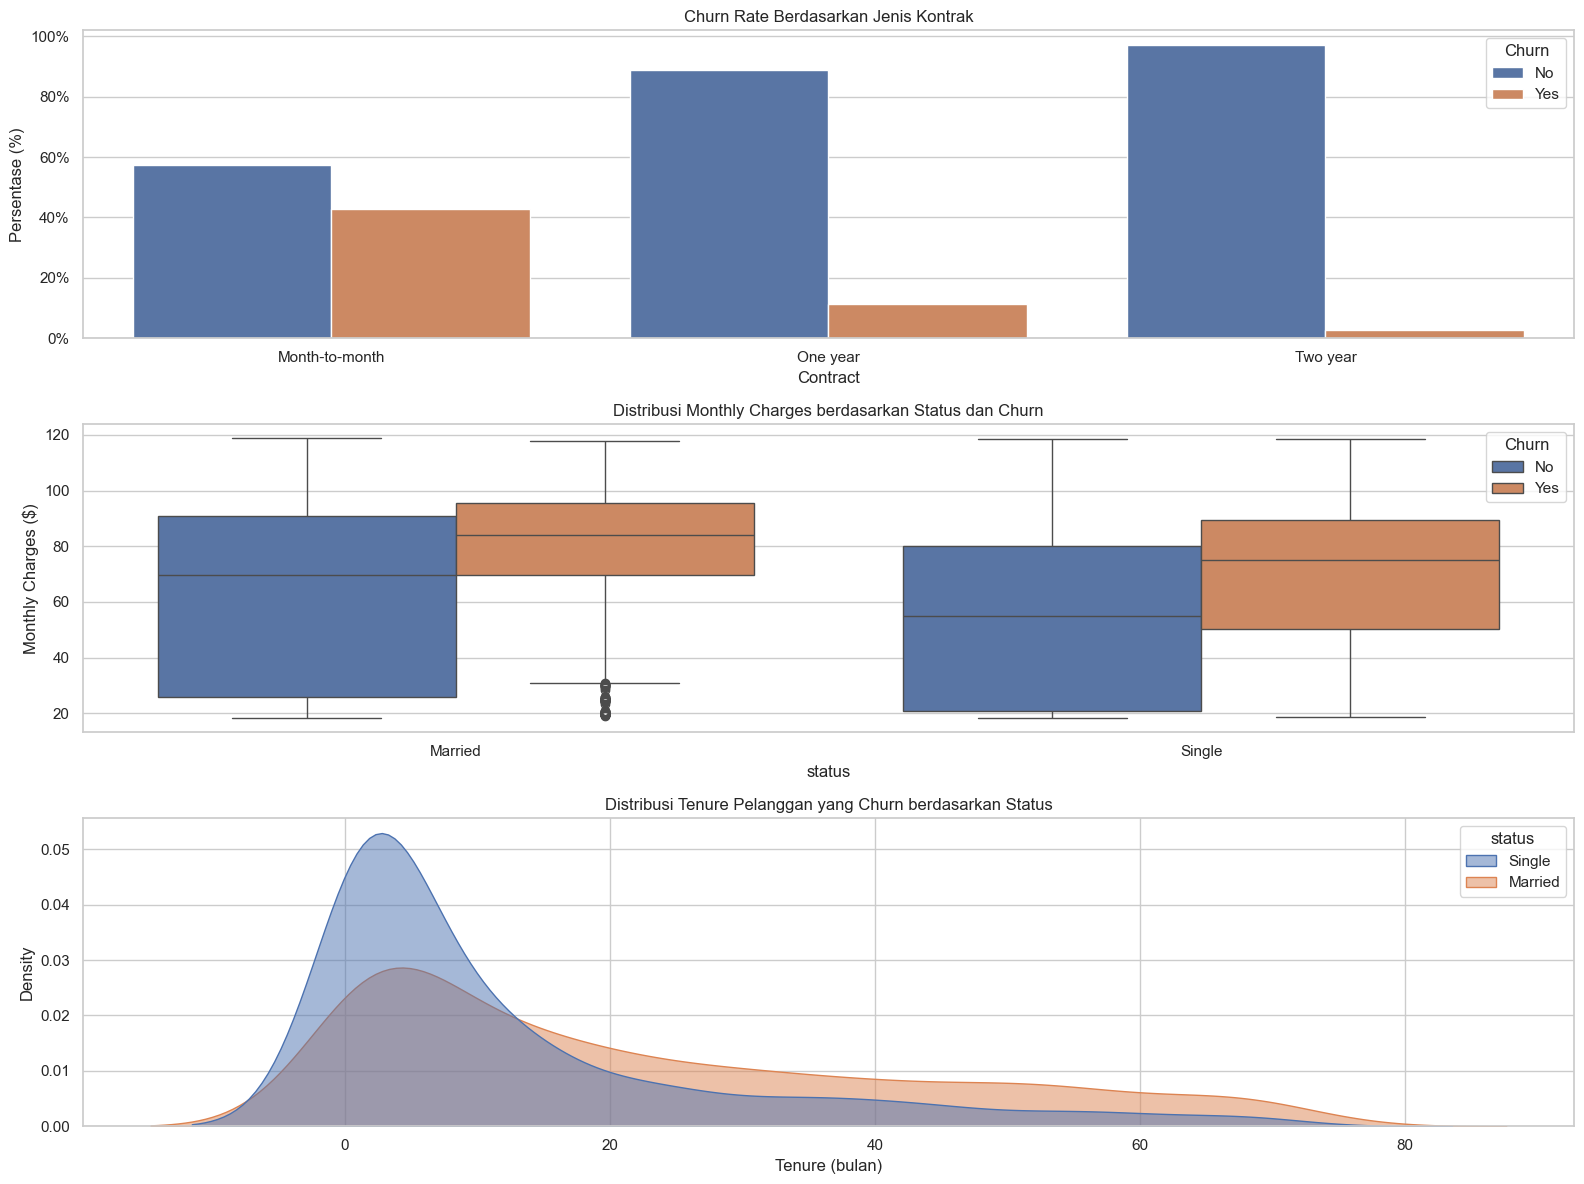

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load data
df = pd.read_csv("telco_customer.csv")

# Buat kolom status
df['status'] = df.apply(
    lambda row: 'Married' if (row['SeniorCitizen'] == 1 or row['Partner'] == 'Yes' or row['Dependents'] == 'Yes') else 'Single',
    axis=1
)

# Konversi TotalCharges ke numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Set style visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# 1. Churn rate berdasarkan jenis kontrak
plt.subplot(3, 1, 1)
contract_churn = df.groupby(['Contract', 'Churn']).size().reset_index(name='Count')
contract_total = contract_churn.groupby('Contract')['Count'].transform('sum')
contract_churn['Percentage'] = contract_churn['Count'] / contract_total * 100
sns.barplot(x='Contract', y='Percentage', hue='Churn', data=contract_churn)
plt.title("Churn Rate Berdasarkan Jenis Kontrak")
plt.ylabel("Persentase (%)")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# 2. Distribusi Monthly Charges berdasarkan Status dan Churn
plt.subplot(3, 1, 2)
sns.boxplot(x='status', y='MonthlyCharges', hue='Churn', data=df)
plt.title("Distribusi Monthly Charges berdasarkan Status dan Churn")
plt.ylabel("Monthly Charges ($)")

# 3. Distribusi Tenure berdasarkan Status untuk yang Churn
plt.subplot(3, 1, 3)
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='tenure', hue='status', fill=True, common_norm=False, alpha=0.5)
plt.title("Distribusi Tenure Pelanggan yang Churn berdasarkan Status")
plt.xlabel("Tenure (bulan)")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load data
df = pd.read_csv("telco_customer.csv")

# Buat kolom status
df['status'] = df.apply(
    lambda row: 'Married' if (row['SeniorCitizen'] == 1 or row['Partner'] == 'Yes' or row['Dependents'] == 'Yes') else 'Single',
    axis=1
)

# Konversi TotalCharges ke numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Ukuran standar (px)
width = 800
height = 500

# 1. Churn berdasarkan tenure
fig1 = px.histogram(df[df['Churn'] == 'Yes'], x='tenure', nbins=30,
                    title='Distribusi Tenure Saat Pelanggan Churn',
                    color_discrete_sequence=['salmon'],
                    width=width, height=height)
fig1.update_layout(xaxis_title="Tenure (bulan)", yaxis_title="Jumlah Pelanggan")

# 2. Churn berdasarkan jenis kontrak
contract_churn = df.groupby(['Contract', 'Churn']).size().reset_index(name='Count')
contract_total = contract_churn.groupby('Contract')['Count'].transform('sum')
contract_churn['Percentage'] = contract_churn['Count'] / contract_total * 100

fig2 = px.bar(contract_churn, x='Contract', y='Percentage', color='Churn', barmode='group',
              title="Churn Rate Berdasarkan Jenis Kontrak", text_auto='.2s',
              width=width, height=height)
fig2.update_layout(yaxis_tickformat='.0%', yaxis_title="Persentase (%)")

# 3. Status pelanggan yang churn
fig3 = px.histogram(df, x='status', color='Churn', barmode='group',
                    title="Status Pelanggan dan Churn", width=width, height=height)

# 4. Persebaran tenure berdasarkan status
fig4 = px.box(df, x='status', y='tenure', color='status',
              title="Persebaran Tenure Berdasarkan Status", width=width, height=height)

# 5. Distribusi Monthly Charges pelanggan churn
fig5 = px.histogram(df[df['Churn'] == 'Yes'], x='MonthlyCharges', nbins=30,
                    title='Distribusi Monthly Charges Pelanggan yang Churn',
                    color_discrete_sequence=['skyblue'], width=width, height=height)
fig5.update_layout(xaxis_title="Monthly Charges", yaxis_title="Jumlah Pelanggan")

# 6. Monthly Charges berdasarkan status pelanggan
fig6 = px.box(df, x='status', y='MonthlyCharges', color='status',
              title="Monthly Charges Berdasarkan Status Pelanggan", width=width, height=height)

# Tampilkan semua grafik
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()



In [ ]:
df['Status']= np.where(
    (df['SeniorCitizen']==1) or (df['Partner']=='Yes') or (df['Dependents']=='Yes'),
    'Married','Single'
)
data=df[['customerID','tenure','Contract','MonthlyCharges','Status','Churn']]
df_gt = (data[data['Churn']=='Yes'].groupby('tenure').agg('customerID').nunique().reset_index())
df_gt